In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [68]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [69]:
type(x_train)

numpy.ndarray

In [70]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (60000, 28, 28)
Training Labels Shape :  (60000,)
Testing Data Shape    :  (10000, 28, 28)
Testing Labels Shape  :  (10000,)


(-0.5, 27.5, 27.5, -0.5)

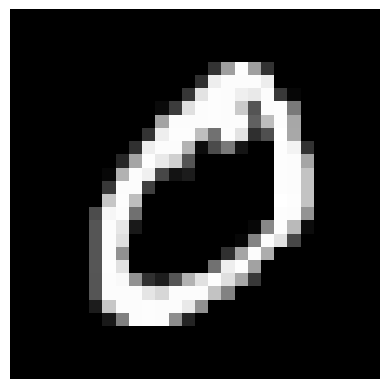

In [71]:
plt.imshow(x_train[1], cmap = 'gray')
plt.axis('off')

In [72]:
np.set_printoptions(linewidth = 200)
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [73]:
x_train[1].shape

(28, 28)

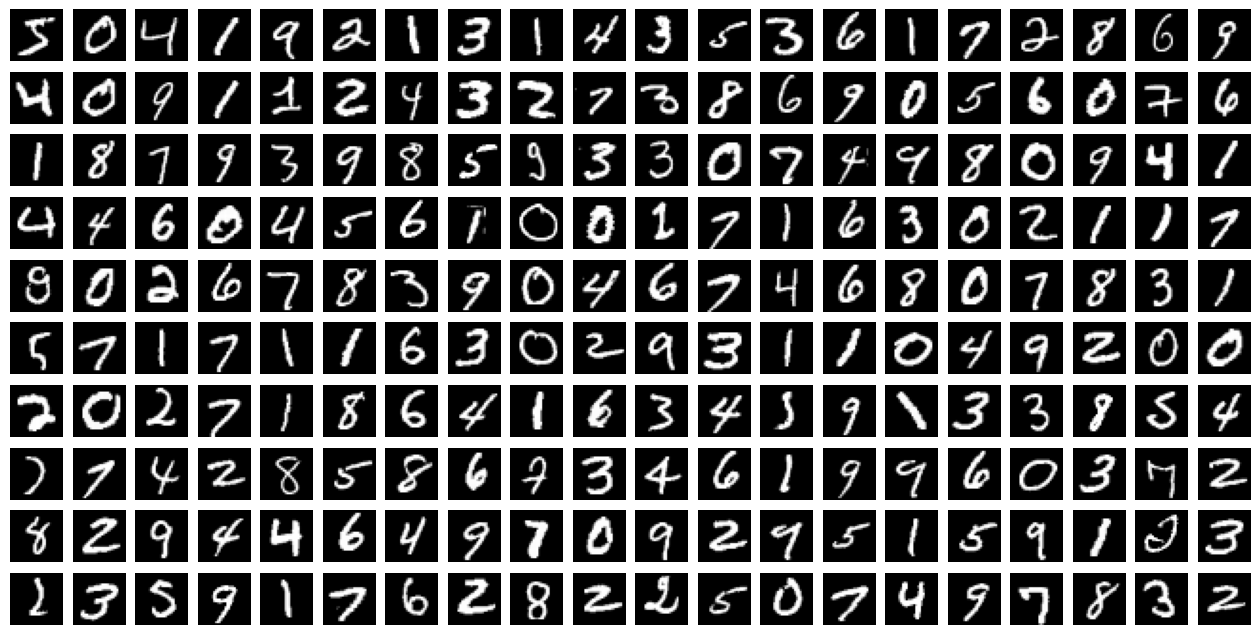

In [74]:
plt.figure(figsize = (16,8))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.axis('off')



---



---

In [75]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [76]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

In [77]:
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

In [78]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (60000, 28, 28, 1)
Training Labels Shape :  (60000, 10)
Testing Data Shape    :  (10000, 28, 28, 1)
Testing Labels Shape  :  (10000, 10)


In [79]:
# Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    # rotation_range = 10,
    # zoom_range = 10,
    # shear_range = 10,
    # horizontal_flip = True,
    # vertical_flip = True
)

train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train, y_train, batch_size = 1000)

In [80]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_test)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 1000)

# Steps to Create and train a neural network
  1. Create the architecture
  2. Compile the model
  3. Fit the model

In [81]:
# Creating an architecture

model = tf.keras.models.Sequential()
model.add(Conv2D(16, (5,5), activation = 'relu', padding = 'valid', input_shape = (28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [82]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),   # (SGD(), Adam(), RMSprop())
              metrics = ['accuracy'])

In [83]:
# Fit the model
history = model.fit(
    train_generator,
    validation_data = (val_generator),
    epochs = 50,
    verbose = 1)

Epoch 1/50
60/60 [==============================] - 16s 235ms/step - loss: 1.2173 - accuracy: 0.6254 - val_loss: 0.2843 - val_accuracy: 0.9180
Epoch 2/50
60/60 [==============================] - 15s 252ms/step - loss: 0.3998 - accuracy: 0.8831 - val_loss: 0.1209 - val_accuracy: 0.9651
Epoch 3/50
60/60 [==============================] - 14s 239ms/step - loss: 0.2188 - accuracy: 0.9364 - val_loss: 0.0918 - val_accuracy: 0.9726
Epoch 4/50
60/60 [==============================] - 14s 239ms/step - loss: 0.1662 - accuracy: 0.9503 - val_loss: 0.0761 - val_accuracy: 0.9764
Epoch 5/50
60/60 [==============================] - 15s 249ms/step - loss: 0.1477 - accuracy: 0.9556 - val_loss: 0.0600 - val_accuracy: 0.9816
Epoch 6/50
60/60 [==============================] - 14s 237ms/step - loss: 0.1270 - accuracy: 0.9615 - val_loss: 0.0579 - val_accuracy: 0.9820
Epoch 7/50
60/60 [==============================] - 14s 239ms/step - loss: 0.1166 - accuracy: 0.9645 - val_loss: 0.0590 - val_accuracy: 0.9811

In [84]:
type(history.history)

dict

In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [86]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val  = history.history['val_loss']

num_epochs = range(1,51)

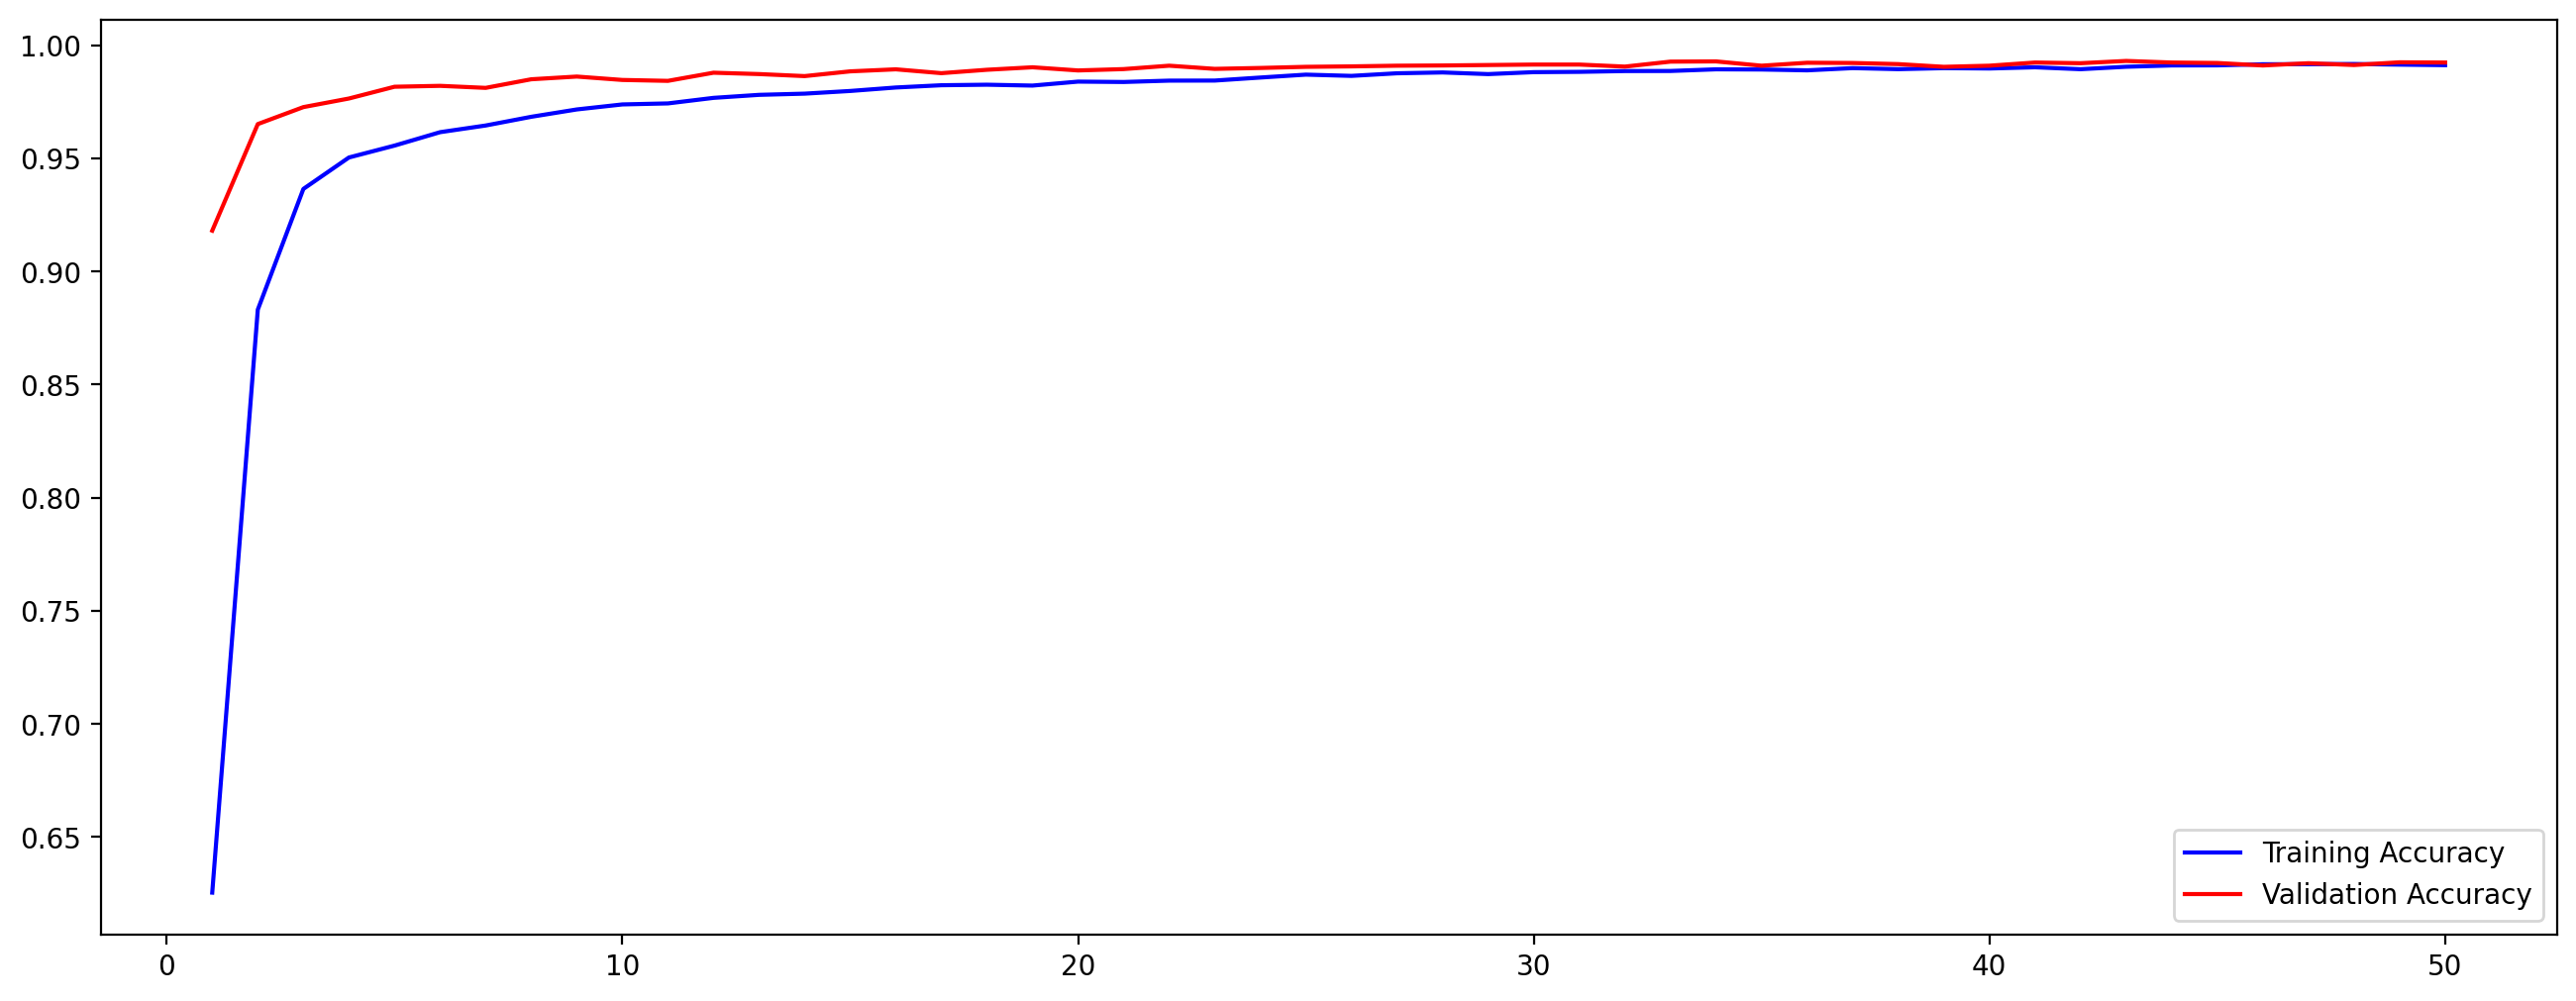

In [87]:
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

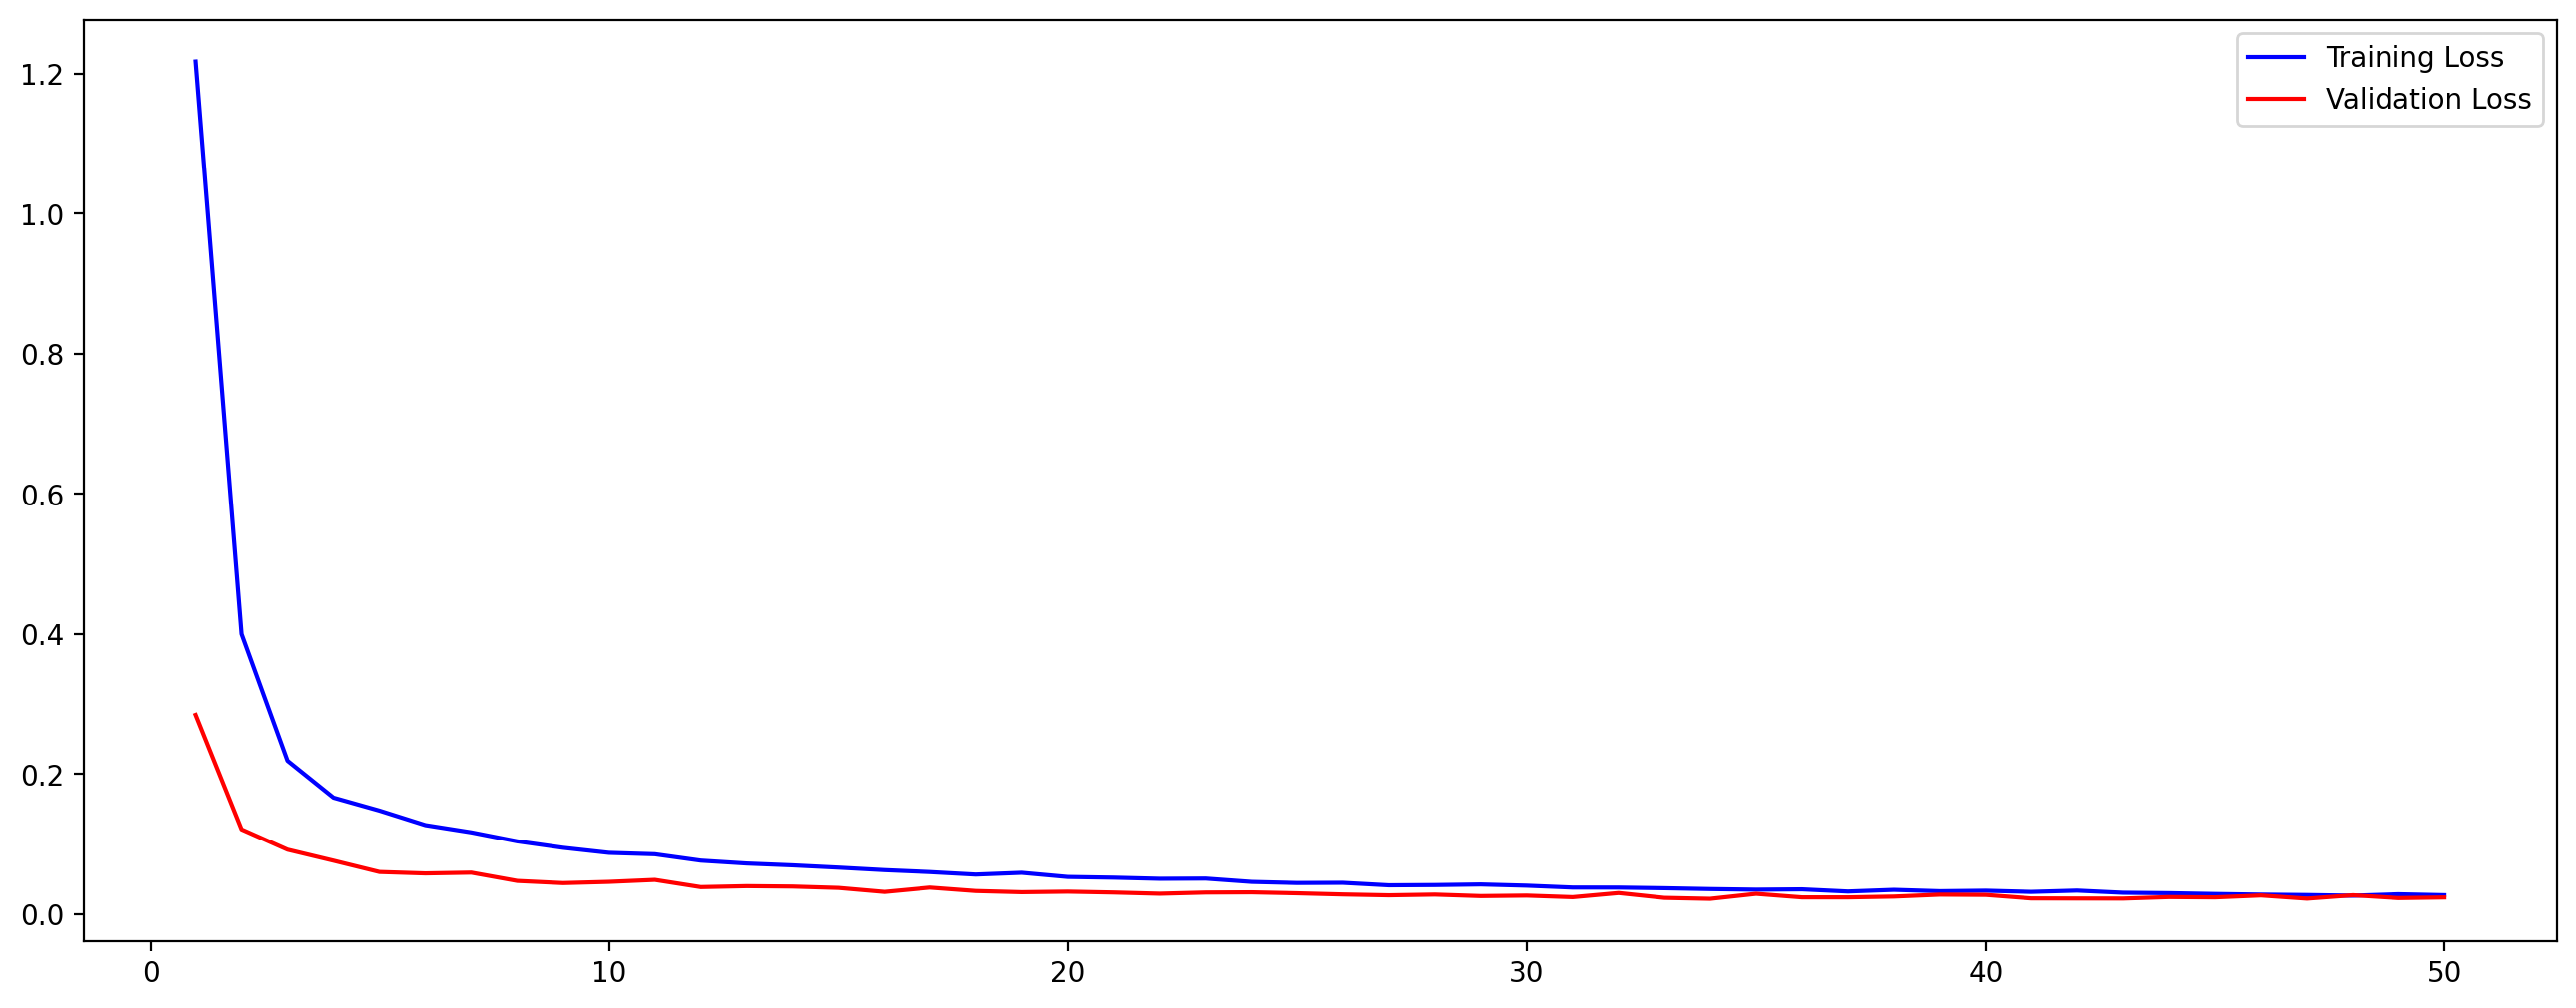

In [88]:
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val,   c = 'red',  label = 'Validation Loss')
plt.legend()

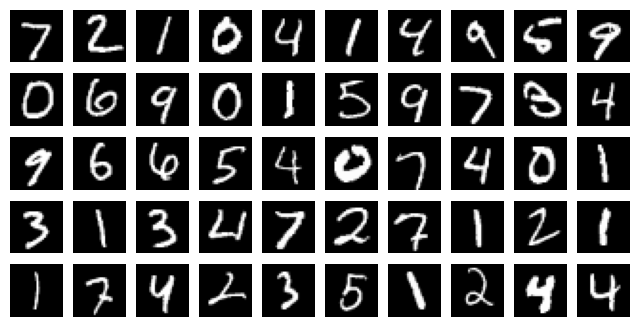

In [89]:
plt.figure(figsize = (8,4))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.axis('off')
  plt.imshow(x_test[i], cmap = 'gray')

In [90]:
np.set_printoptions(linewidth = 500)
model.predict(x_test[0:10])

1/1 [==============================] - 0s 64ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [91]:
def predict_digit(x):
  digit = model.predict(x)
  digit = np.argmax(digit, axis = 1)[0]
  print('The digit in the image is : ', digit)

In [92]:
predict_digit(x_test[4:5])

1/1 [==============================] - 0s 16ms/step
The digit in the image is :  4
